# Loans: Get Tested, Know Your Status
## by D'Jreya Boyd

## Preliminary Wrangling

> The loans dataset originally consisted of 113,937 rows and 81 columns of lender/loan data.

In [57]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [58]:
loans = pd.read_csv('prosperLoanData.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [59]:
loans

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1


In [60]:
#Replace Employment Status Duration with 0 if NaN
loans.EmploymentStatusDuration.fillna(value = 0)

0           2.0
1          44.0
2           0.0
3         113.0
4          44.0
5          82.0
6         172.0
7         103.0
8         269.0
9         269.0
10        300.0
11         19.0
12          1.0
13         98.0
14         35.0
15        121.0
16        133.0
17          0.0
18        179.0
19         18.0
20        175.0
21         36.0
22         68.0
23          3.0
24         91.0
25         15.0
26         25.0
27         10.0
28         48.0
29         16.0
          ...  
113907     86.0
113908     68.0
113909    265.0
113910      8.0
113911     51.0
113912    102.0
113913     19.0
113914      0.0
113915     43.0
113916    149.0
113917     32.0
113918    252.0
113919     12.0
113920    110.0
113921      0.0
113922    115.0
113923     83.0
113924     56.0
113925     31.0
113926      0.0
113927     69.0
113928     22.0
113929     25.0
113930     85.0
113931     12.0
113932    246.0
113933     21.0
113934     84.0
113935     94.0
113936    244.0
Name: EmploymentStatusDu

In [61]:
#new data set with fewer columns
loans2 = loans[['MemberKey','CreditGrade','LoanCurrentDaysDelinquent'\
                ,'BorrowerAPR','BorrowerRate','Term',\
                'LoanMonthsSinceOrigination','LoanStatus','Occupation',\
                'EmploymentStatus', 'EmploymentStatusDuration',\
                'MonthlyLoanPayment', 'LoanOriginalAmount',\
                'DebtToIncomeRatio','IncomeRange',\
                'IncomeVerifiable','StatedMonthlyIncome']]
loans2 = loans2[np.isfinite(loans2['EmploymentStatusDuration'])]
loans2_clean = loans2.copy()
loans2_clean['Term'] = loans2_clean['Term'].astype(object)
loans2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106312 entries, 0 to 113936
Data columns (total 17 columns):
MemberKey                     106312 non-null object
CreditGrade                   21347 non-null object
LoanCurrentDaysDelinquent     106312 non-null int64
BorrowerAPR                   106312 non-null float64
BorrowerRate                  106312 non-null float64
Term                          106312 non-null object
LoanMonthsSinceOrigination    106312 non-null int64
LoanStatus                    106312 non-null object
Occupation                    104985 non-null object
EmploymentStatus              106312 non-null object
EmploymentStatusDuration      106312 non-null float64
MonthlyLoanPayment            106312 non-null float64
LoanOriginalAmount            106312 non-null int64
DebtToIncomeRatio             97888 non-null float64
IncomeRange                   106312 non-null object
IncomeVerifiable              106312 non-null bool
StatedMonthlyIncome           106312 non-nu

In [62]:
loans2_clean.shape

(106312, 17)

In [63]:
loans2_clean.LoanStatus.value_counts()

Current                   56566
Completed                 33548
Chargedoff                10634
Defaulted                  3291
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: LoanStatus, dtype: int64

### What is the structure of your dataset?

> There are 113,937 loans and 81 details about each of those loans within the original daataset. The separated data (loans2) consists of the same number of loans, however with only 15(Borrower APR, Borrower Rate, Lender Yield, Loan Status, Occupation, Employment Status, Employment Status Duration, Monthly Loan Payment , Loan Original Amount, Debt To Income Ratio, IncomeRange, Income Verifiable, Stated Monthly Income) variables. The majority of the variables are quantitative witha few qualitative such as loan status, occupation and income range.

### What is/are the main feature(s) of interest in your dataset?

> The main feature is loan status, whether or not the lendee is current with their payments.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe Term, Employment Duration, Loan Amount, Monthly Payment and Borrower Rate all have an affect on whether a lendee is current on a loan or not.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [64]:
def infos(title,x,y):
    plt.ylabel(y)
    plt.xlabel(x)
    plt.title(title)

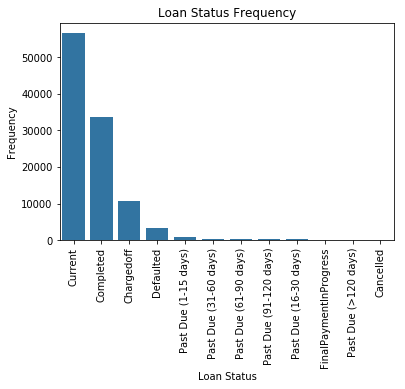

In [65]:
#Loan Status
base_color = sb.color_palette()[0]
status_order = loans2_clean.LoanStatus.value_counts().index
sb.countplot(data= loans2_clean, x = 'LoanStatus', color = base_color, order = status_order)
plt.xticks(rotation = 90)
infos('Loan Status Frequency','Loan Status','Frequency') ;

> The majority of the loans are current. I will use this information to compare the current loans with their rates, loan amounts, term length, monthly payment, and employment duration.

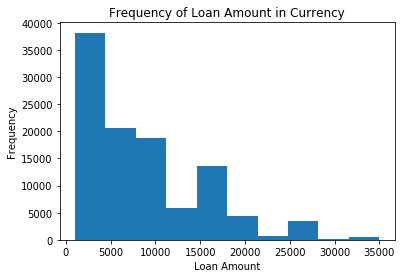

In [66]:
#Loan Original Amount
plt.hist(data = loans2_clean, x = 'LoanOriginalAmount')
infos('Frequency of Loan Amount in Currency','Loan Amount','Frequency');

> The tail isn't very long on this right skewed data. There are spikes present on uneven intervals.

In [67]:
loans2_clean.LoanOriginalAmount.mean(),(loans2_clean['LoanOriginalAmount'] > 24000).mean()

(8566.440693430657, 0.03975092181503499)

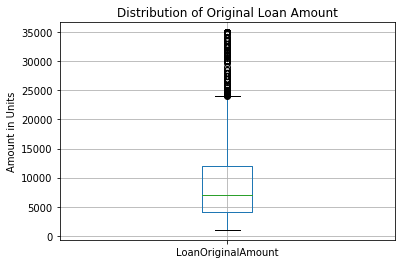

In [68]:
loans2_clean.boxplot(column = "LoanOriginalAmount")
plt.ylabel('Amount in Units')
plt.title('Distribution of Original Loan Amount');

> The distrubution of the original loan amount is right-skewed and multimodal. The largest part of the distrubution is less than 10,000. The mean loan amount is 8337.01. Less than 4 % of the loans were above the $24000 mark. 

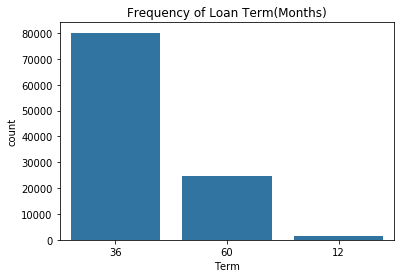

In [69]:
#Term
term_order = loans2_clean.Term.value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = loans2_clean, x = 'Term', order = term_order, color = base_color)
plt.title('Frequency of Loan Term(Months)') ;

> More than half of the terms were 3 year [36 month] terms. With the fewest loans being given for 12 months.

In [70]:
#Borrower Rate
plt.hist(data = loans2_clean, x = 'BorrowerRate')
 ;

IndentationError: unexpected indent (<ipython-input-70-8b62690f0ccd>, line 3)

In [ ]:
loans2_clean.boxplot(column = 'BorrowerRate')
plt.title('Distribution of Borrower Interest Rate')
plt.xlabel('Borrower Rate');

> The data is slightly left skewed with most of the data falling below a 20 % borrower rate. There are few outliers reaching as high as .5. 

In [ ]:
#Employment Duration by months
loans2_clean.boxplot(column = 'EmploymentStatusDuration')
plt.title('Employement Duration by Months')
plt.xlabel('Employment Status Duration');
#find the proportion of the values that are greater than th 75 % quartile 
term_outliers = (loans2_clean['EmploymentStatusDuration'] > 300).mean()
term_outliers

> 4.45% of the loans were above 300. Some of the data may need to be excluded because the values reach above 750 which is more than 62 years. While this time period isn't impossible, it is highly unlikely. It would be easier to know what to eliminate if the age of the individual was known.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the loan status, most of the data is within the first four levels. Compared to the whole, there are not many in the remaining 8 levels. The bars are barely visible within the figure. The sum of the lendees in the 10 bad standing levels does not 
exceed the total number of completed loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The Employment Status Duration distribution was a weird distribution. Some of the outliers were upwards of 750 months. While this is possible , its difficult t accomplish. There were also null values in the data for the employment status duration, I removed those values to clean the data.
The term data is saved as a numerical value, however I used it as a categorical value. I made it this way, because it had 3 set levels(12, 36, 60)

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
# Term to Loan Status (qual vs qual)
status_order = ['Current','Completed', 'Chargedoff', 'Defaulted']
sb.countplot(data = loans2_clean, x = 'LoanStatus', hue = 'Term', order = status_order )
plt.xticks(rotation = 70);

In [ ]:
loans2_clean.Term.value_counts().index[1]

In [ ]:
status_order = ['Current','Completed', 'Chargedoff', 'Defaulted']
sb.countplot(data = loans2_clean, x = 'LoanStatus', hue = 'Term', order = status_order, hue_order =  '60' )
plt.xticks(rotation = 70);

> The 3 year term isn't a swaying feature, however with a longer term lendees are more likely to pay off the loan than to not have. Though this is true for each of the terms. The presence of 3 year terms is strong within all terms, more than half of those with a 5 year term were current on their loans.

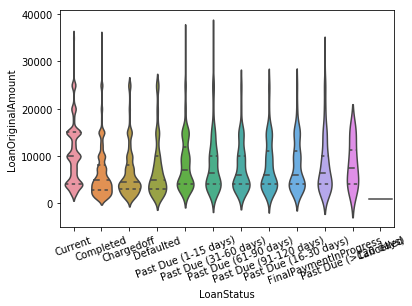

In [71]:
sb.violinplot(data = loans2_clean, y = 'LoanOriginalAmount', x = 'LoanStatus', order = status_order, inner = 'quartile')
plt.xticks(rotation = 20);

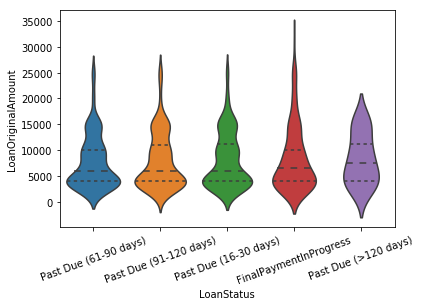

In [72]:
vals = loans2_clean.LoanStatus.value_counts().index
rstatus_order = vals[-6:-1]
sb.violinplot(data = loans2_clean, y = 'LoanOriginalAmount', x = 'LoanStatus', order = rstatus_order, inner = 'quartile')
plt.xticks(rotation = 20);

> For loans with [Completed, ChargedOff, Defaulted] statuses the distrubution is virtually identical. The trend with the various past due and finalpayment in progress are also similar with a median value of around 6000. The cancelled data is the extreme exception. The graph is squat and the values all hover around the same value. This leads me to believe that loan amount doesn't have much to do with the status of the loan, just because the distributions are similar for current charged off and past due loans.

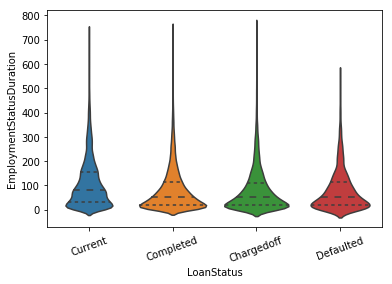

In [73]:
# Employment Duration to Loan Status (quant vs qual)
status_order = ['Current','Completed', 'Chargedoff', 'Defaulted']
sb.violinplot(data = loans2_clean, x = 'LoanStatus', y = 'EmploymentStatusDuration',\
              order = status_order, inner = 'quartile')
plt.xticks(rotation = 20);

>

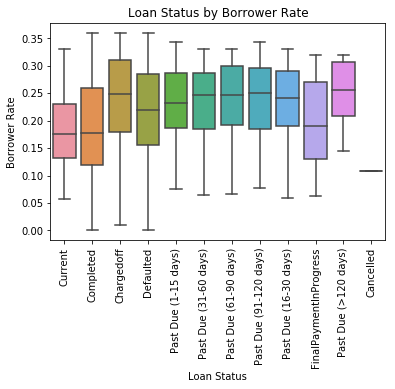

In [74]:
# Rate to Loan Status (quant vs qual)
#Loan Status
status_order = loans2_clean.LoanStatus.value_counts().index
sb.boxplot(data = loans2_clean, x = 'LoanStatus', y = 'BorrowerRate', order = status_order)
plt.xticks(rotation = 90)
plt.xlabel('Loan Status')
plt.ylabel('Borrower Rate')
plt.title('Loan Status by Borrower Rate');

> For 80% of the loan statuses in bad standing, the median Borrower Rate is above .22 and more than 75 % of the data is above .15. This leads me to believe a higher borrower rate on average does affect the loan status.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> The main thing I want to explore within these plots is the relationship between term, loan amount and interest rate.

In [75]:
#Using color as the encoding for the third variable
term_order

Int64Index([36, 60, 12], dtype='int64')

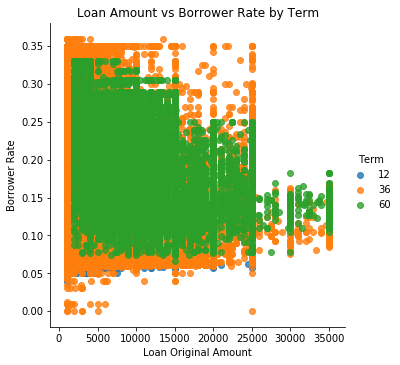

In [82]:
sb.lmplot(x='LoanOriginalAmount', y='BorrowerRate', hue='Term', 
           data = loans2_clean.loc[loans2_clean['Term'].isin([36, 60 ,12])], 
           fit_reg=False)
infos('Loan Amount vs Borrower Rate by Term','Loan Original Amount', 'Borrower Rate');

> From this graph we can see a slight correlation between the rate and the original loan amount. The loans greater than 25,000 have lower maximum values greater than 12 month terms. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration shows a slightly negative relationship between the interest rate and the 

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!